In [2]:
import xarray as xr
import numpy as np
import pandas as pd

In [3]:
file_name = "./Small-world(Regular-Lattice)_u=1000.0_p=0.1_max-count-nodes=950_max-count-neighbors=25.nc"
df = xr.open_dataset(file_name)

In [4]:
rd_array = df.real_diameters.to_numpy()
conn = df.cneigh.to_numpy()
max_diam = df.real_diameters.max()
counters = np.zeros(shape=(int(max_diam), len(conn)))
sum_lnz = np.ones(shape=(int(max_diam), len(conn)))
df_lnz = df.lnz.to_numpy()

In [5]:
for i, neighs in enumerate(conn):
    for j, nodes in enumerate(df.cnodes):
        rd = int(rd_array[j, i]) - 1
        counters[rd, i] = counters[rd, i] + 1
        
        sum_lnz[rd, i] = sum_lnz[rd, i] + df_lnz[j,i]

coord_names = ["diameters", "connectivity"]

lnz = np.divide(sum_lnz, counters)

diameters = np.arange(1, max_diam + 1)

/tmp/ipykernel_5505/2094347514.py:10: RuntimeWarning: divide by zero encountered in true_divide
  lnz = np.divide(sum_lnz, counters)


In [6]:
mdf = xr.Dataset({
        "sum_lnz": (coord_names, sum_lnz),
        "counters": (coord_names, counters),
        "lnz": (coord_names, lnz),
    },
        coords={
        "diameters": diameters,
        "connectivity": conn,
    })


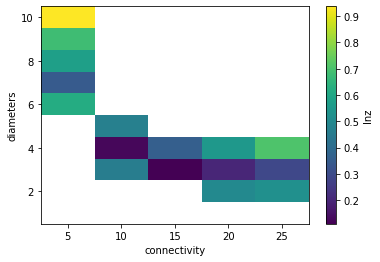

In [7]:
mdf.lnz.plot()

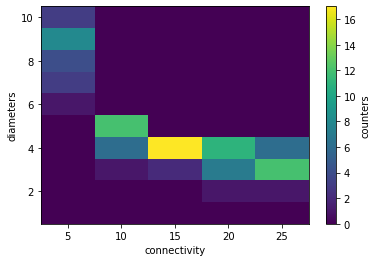

In [33]:
mdf.counters.plot()

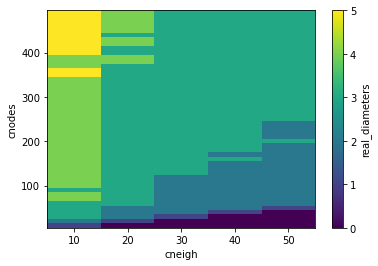

In [34]:
df.real_diameters.plot()